# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
# to draw pictures in jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

# Загрузка и первичный анализ данных

In [172]:
data = pd.read_csv("C:/Users/VTsapiy/Desktop/лаба3/train.csv", sep=',')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [169]:
data.shape

(401, 25)

In [164]:
data.dtypes

age      object
bp       object
sg       object
al       object
su       object
rbc      object
pc       object
pcc      object
ba       object
bgr      object
bu       object
sc       object
sod      object
pot      object
hemo     object
pcv      object
wc       object
rc       object
htn      object
dm       object
cad      object
appet    object
pe       object
ane      object
class    object
dtype: object

In [97]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [98]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1460


# 1. Обработка пропусков в данных

# 1.1. Простые стратегии - удаление или заполнение нулями

In [99]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((1460, 81), (1460, 62))

In [100]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((1460, 81), (0, 81))

In [101]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [102]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе колонки содержащине описание и текстовые поля
data_new_3 = data.fillna(0)
data_new_3.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,0,0,0,12,2008,WD,Normal,250000


# 1.2. "Внедрение значений" - импьютация (imputation)

# 1.2.1. Обработка пропусков в числовых данных

In [103]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='int64' or dt=='float64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка LotFrontage. Тип данных float64. Количество пустых значений 259, 17.74%.
Колонка MasVnrArea. Тип данных float64. Количество пустых значений 8, 0.55%.
Колонка GarageYrBlt. Тип данных float64. Количество пустых значений 81, 5.55%.


In [104]:
data_num = data[num_cols]
data_num

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


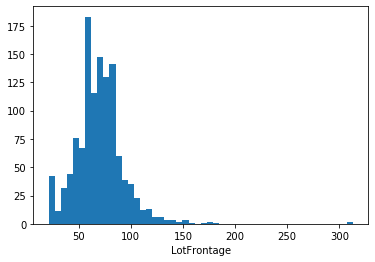

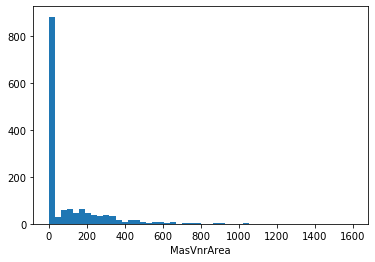

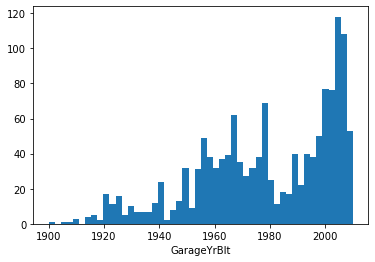

In [105]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [107]:
data[data['LotFrontage'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1981,1981,Gable,CompShg,MetalSd,MetalSd,BrkFace,310.0,Gd,Gd,CBlock,Gd,TA,No,BLQ,678,Unf,0,762,1440,GasA,Ex,Y,SBrkr,1440,0,0,1440,0,0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1981.0,Fin,2,467,TA,TA,Y,0,0,99,0,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal,182900
1431,1432,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,6,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,LwQ,958,Unf,0,0,958,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,0,NaN,Attchd,1976.0,RFn,2,440,TA,TA,Y,0,60,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,143750
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,147.0,Gd,TA,PConc,Gd,TA,Av,GLQ,697,Unf,0,151,848,GasA,Ex,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,Gd,3,Typ,1,TA,Attchd,2004.0,RFn,2,420,TA,TA,Y,149,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952

In [108]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['LotFrontage'].isnull()].index
flt_index

Int64Index([   7,   12,   14,   16,   24,   31,   42,   43,   50,   64,
            ...
            1407, 1417, 1419, 1423, 1424, 1429, 1431, 1441, 1443, 1446],
           dtype='int64', length=259)

In [109]:
# Проверяем что выводятся нужные строки
data[data.index.isin(flt_index)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1981,1981,Gable,CompShg,MetalSd,MetalSd,BrkFace,310.0,Gd,Gd,CBlock,Gd,TA,No,BLQ,678,Unf,0,762,1440,GasA,Ex,Y,SBrkr,1440,0,0,1440,0,0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1981.0,Fin,2,467,TA,TA,Y,0,0,99,0,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal,182900
1431,1432,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,6,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,LwQ,958,Unf,0,0,958,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,0,NaN,Attchd,1976.0,RFn,2,440,TA,TA,Y,0,60,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,143750
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,147.0,Gd,TA,PConc,Gd,TA,Av,GLQ,697,Unf,0,151,848,GasA,Ex,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,Gd,3,Typ,1,TA,Attchd,2004.0,RFn,2,420,TA,TA,Y,149,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952

In [110]:
# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['LotFrontage']

7      NaN
12     NaN
14     NaN
16     NaN
24     NaN
        ..
1429   NaN
1431   NaN
1441   NaN
1443   NaN
1446   NaN
Name: LotFrontage, Length: 259, dtype: float64

In [115]:
data_num_LotFrontage = data_num[['LotFrontage']]
data_num_LotFrontage.head()

,LotFrontage
0,65.0
1,80.0
2,68.0
3,60.0
4,84.0


In [116]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [117]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_LotFrontage)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [118]:
strategies=['mean', 'median','most_frequent']

In [119]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_LotFrontage)
    return data_num_imp[mask_missing_values_only]

In [120]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([70.04995837, 70.04995837, 70.04995837, 70.04995837, 70.04995837,
        70.04995837, 70.04995837, 70.04995837, 70.04995837, 70.04995837,
        70.04995837, 70.04995837, 70.04995837, 70.04995837, 70.04995837,
        70.04995837, 70.04995837, 70.04995837, 70.04995837, 70.04995837,
        70.04995837, 70.04995837, 70.04995837, 70.04995837, 70.04995837,
        70.04995837, 70.04995837, 70.04995837, 70.04995837, 70.04995837,
        70.04995837, 70.04995837, 70.04995837, 70.04995837, 70.04995837,
        70.04995837, 70.04995837, 70.04995837, 70.04995837, 70.04995837,
        70.04995837, 70.04995837, 70.04995837, 70.04995837, 70.04995837,
        70.04995837, 70.04995837, 70.04995837, 70.04995837, 70.04995837,
        70.04995837, 70.04995837, 70.04995837, 70.04995837, 70.04995837,
        70.04995837, 70.04995837, 70.04995837, 70.04995837, 70.04995837,
        70.04995837, 70.04995837, 70.04995837, 70.04995837, 70.04995837,
        70.04995837, 70.04995837, 70.04995

In [121]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69.,
        69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69.,
        69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69.,
        69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69.,
        69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69.,
        69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69.,
        69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69.,
        69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69.,
        69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69.,
        69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69.,
        69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69.,
        69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69.,
        69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69., 69.,
        69., 69., 69., 69., 69., 69., 69

In [122]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
        60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
        60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
        60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
        60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
        60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
        60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
        60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
        60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
        60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
        60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
        60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
        60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
        60., 60., 60., 60., 60., 

In [123]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [124]:
data[['MasVnrArea']].describe()

,MasVnrArea
count,1452.000000
mean,103.685262
std,181.066207
min,0.000000
25%,0.000000
50%,0.000000
75%,166.000000
max,1600.000000


In [125]:
test_num_impute_col(data, 'MasVnrArea', strategies[0])

('MasVnrArea', 'mean', 8, 103.68526170798899, 103.68526170798899)

In [126]:
test_num_impute_col(data, 'MasVnrArea', strategies[1])

('MasVnrArea', 'median', 8, 0.0, 0.0)

In [127]:
test_num_impute_col(data, 'MasVnrArea', strategies[2])

('MasVnrArea', 'most_frequent', 8, 0.0, 0.0)

# 1.2.2. Обработка пропусков в категориальных данных

In [128]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Alley. Тип данных object. Количество пустых значений 1369, 93.77%.
Колонка MasVnrType. Тип данных object. Количество пустых значений 8, 0.55%.
Колонка BsmtQual. Тип данных object. Количество пустых значений 37, 2.53%.
Колонка BsmtCond. Тип данных object. Количество пустых значений 37, 2.53%.
Колонка BsmtExposure. Тип данных object. Количество пустых значений 38, 2.6%.
Колонка BsmtFinType1. Тип данных object. Количество пустых значений 37, 2.53%.
Колонка BsmtFinType2. Тип данных object. Количество пустых значений 38, 2.6%.
Колонка Electrical. Тип данных object. Количество пустых значений 1, 0.07%.
Колонка FireplaceQu. Тип данных object. Количество пустых значений 690, 47.26%.
Колонка GarageType. Тип данных object. Количество пустых значений 81, 5.55%.
Колонка GarageFinish. Тип данных object. Количество пустых значений 81, 5.55%.
Колонка GarageQual. Тип данных object. Количество пустых значений 81, 5.55%.
Колонка GarageCond. Тип данных object. Количество пустых значений 81, 5.55%

In [129]:
cat_temp_data = data[['MasVnrType']]
cat_temp_data.head()

,MasVnrType
0,BrkFace
1,None
2,BrkFace
3,None
4,BrkFace


In [130]:
cat_temp_data['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [131]:
cat_temp_data[cat_temp_data['MasVnrType'].isnull()].shape

(8, 1)

In [132]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['BrkFace'],
       ['None'],
       ['BrkFace'],
       ...,
       ['None'],
       ['None'],
       ['None']], dtype=object)

In [133]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['BrkCmn', 'BrkFace', 'None', 'Stone'], dtype=object)

In [134]:

# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='!!!')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['BrkFace'],
       ['None'],
       ['BrkFace'],
       ...,
       ['None'],
       ['None'],
       ['None']], dtype=object)

In [135]:

np.unique(data_imp3)

array(['!!!', 'BrkCmn', 'BrkFace', 'None', 'Stone'], dtype=object)

In [136]:
data_imp3[data_imp3=='!!!'].size

8

# 2. Преобразование категориальных признаков в числовые

In [138]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,BrkFace
1,None
2,BrkFace
3,None
4,BrkFace
...,...
1455,None
1456,Stone
1457,None
1458,None


# 2.1. Кодирование категорий целочисленными значениями - label encoding

In [139]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [140]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [141]:
cat_enc['c1'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [142]:
np.unique(cat_enc_le)

array([0, 1, 2, 3])

In [143]:
le.inverse_transform([0, 1, 2, 3])

array(['BrkCmn', 'BrkFace', 'None', 'Stone'], dtype=object)

# 2.2. Кодирование категорий наборами бинарных значений - one-hot encoding

In [144]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [145]:
cat_enc.shape

(1460, 1)

In [146]:
cat_enc_ohe.shape

(1460, 4)

In [147]:
cat_enc_ohe

<1460x4 sparse matrix of type '<class 'numpy.float64'>'
	with 1460 stored elements in Compressed Sparse Row format>

In [148]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]])

In [149]:
cat_enc.head(10)

,c1
0,BrkFace
1,None
2,BrkFace
3,None
4,BrkFace
5,None
6,Stone
7,Stone
8,None
9,None


# 2.3. Pandas get_dummies - быстрый вариант one-hot кодирования

In [150]:
pd.get_dummies(cat_enc).head()

,c1_BrkCmn,c1_BrkFace,c1_None,c1_Stone
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,1,0,0


In [151]:

pd.get_dummies(cat_temp_data, dummy_na=True).head()

,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan
0,0,1,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0


# 3. Масштабирование данных

In [152]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

# 3.1. MinMax масштабирование

In [153]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['SalePrice']])

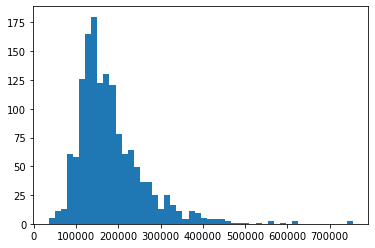

In [154]:
plt.hist(data['SalePrice'], 50)
plt.show()

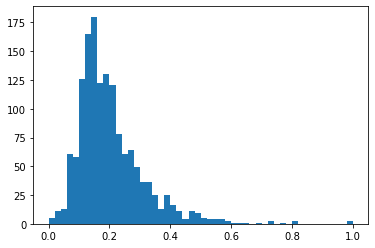

In [155]:
plt.hist(sc1_data, 50)
plt.show()

# 3.2. Масштабирование данных на основе Z-оценки - StandardScaler

In [156]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['SalePrice']])

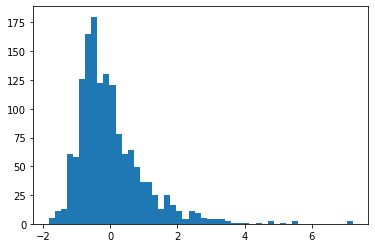

In [157]:
plt.hist(sc2_data, 50)
plt.show()

# 3.3. Нормализация данных

In [158]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['SalePrice']])

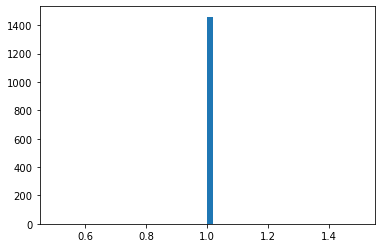

In [159]:
plt.hist(sc3_data, 50)
plt.show()